In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
import numpy as np
import matplotlib.pyplot as plt


def make_meshgrid(ax, h=.02):
    # x_min, x_max = x.min() - 1, x.max() + 1
    # y_min, y_max = y.min() - 1, y.max() + 1
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def draw_boundary(ax, clf):

    xx, yy = make_meshgrid(ax)
    return plot_contours(ax, clf, xx, yy,cmap=plt.cm.coolwarm, alpha=0.5)


In [2]:
df = pd.read_csv("aaron_judge.csv")

In [3]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,FF,2017-09-30,95.7,-2.3581,5.9240,Aaron Judge,592450,608678,strikeout,swinging_strike,...,2,0,2,0,0,2,2,0,Standard,Standard
1,FF,2017-09-30,96.3,-2.5577,5.9023,Aaron Judge,592450,608678,NaN,called_strike,...,2,0,2,0,0,2,2,0,Standard,Standard
2,FF,2017-09-30,95.2,-2.3861,5.8346,Aaron Judge,592450,608678,NaN,called_strike,...,2,0,2,0,0,2,2,0,Standard,Standard
3,SI,2017-09-30,93.4,4.2502,4.6506,Aaron Judge,592450,571901,walk,ball,...,2,0,2,0,0,2,2,0,Standard,Standard
4,SI,2017-09-30,92.8,4.1144,4.4696,Aaron Judge,592450,571901,NaN,called_strike,...,2,0,2,0,0,2,2,0,Standard,Standard


In [7]:
df["type"] = df["type"].map({"S" : 1, "B" : 0})

In [8]:
df["type"].unique()

array([ 1.,  0., nan])

In [15]:
df2 = df[["plate_x", "plate_z", "type"]]

In [16]:
df2

,plate_x,plate_z,type
0,1.0150,2.5730,1.0
1,0.4546,2.3005,1.0
2,0.0957,3.4049,1.0
3,1.5161,2.8389,0.0
4,0.0764,1.7631,1.0
...,...,...,...
2984,-0.3738,2.9865,1.0
2985,-0.2953,3.2500,NaN
2986,1.4094,1.4322,0.0
2987,1.6717,-0.2007,0.0


In [17]:
df2.isnull().sum()

plate_x      2
plate_z      2
type       338
dtype: int64

In [18]:
df2.dropna(axis = 0, inplace = True)

/home/devanshu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df2.isnull().sum()

plate_x    0
plate_z    0
type       0
dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
training_set, validation_set = train_test_split(df2, random_state = 1)

In [44]:
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf", gamma = 100, C = 100)

In [45]:
classifier = SVC(kernel = "rbf", gamma = 100, C = 100)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

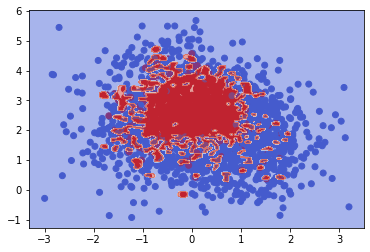

In [46]:
fig, ax = plt.subplots()

plt.scatter(x = df2["plate_x"], y = df2["plate_z"], c = df2["type"], cmap = plt.cm.coolwarm)
draw_boundary(ax, classifier)

In [47]:
classifier.score(validation_set[["plate_x", "plate_z"]], validation_set["type"])

0.7933634992458521

In [51]:
model_score = []
param = []
for gamma in range(1, 101, 5):
    for C in range(1, 101, 5):
        classifier = SVC(kernel = "rbf", gamma = gamma, C = C)
        classifier.fit(training_set[["plate_x", "plate_z"]], training_set["type"])
        a = classifier.score(validation_set[["plate_x", "plate_z"]], validation_set["type"])
        model_score.append(a)
        param.append((gamma, C))
        
        

In [58]:
max(model_score)

0.8371040723981901